<a href="https://colab.research.google.com/github/LalitWagh/LalitWagh/blob/main/Decision_Tree_Classification_using_Adult_income_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading dataset & assigning variable
dataset = pd.read_csv('/content/drive/MyDrive/adult.csv')

In [3]:
dataset.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','class']

In [4]:
# Viewing First five rows of dataset
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53.0,*,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28.0,Private,338409.0,Bachelors,13.0,*,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,NaN,0.0,0.0,40.0,United-States,<=50K


In [5]:
# Searching for Any special character values in dataset
dataset.isin(["?","*","@","#","%","&"]).sum()

age                  0
workclass         1838
fnlwgt               0
education            0
education_num        0
marital_status       2
occupation        1844
relationship         0
race                 0
sex                  2
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     584
class                0
dtype: int64

In [6]:
# Replacing special characters as Nan values
dataset = dataset.replace(to_replace=["?","*"], value=np.nan)

In [7]:
# Deleting Irrelavant columns
dataset.drop(['education','fnlwgt'], axis = 1, inplace = True)

# **Handling missing values in the dataset**

In [8]:
# Saving categorical value and numerical values in different variable 
cat_cols = ['workclass','marital_status','occupation','relationship','race','sex','native_country', 'class']
num_cols =['age','education_num','capital_gain','capital_loss','hours_per_week']

In [9]:
# Filling missing(Nan) values with mode of categorical columns
for column in cat_cols:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

In [10]:
# Filling Missing(Nan) values with mean of numerical columns
for col in num_cols:
    mean = dataset[col].mean()
    dataset[col].fillna(value=mean, inplace=True)

In [11]:
dataset.isnull().sum() #Checking for null values

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64

<function matplotlib.pyplot.show>

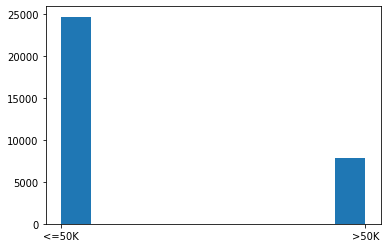

In [12]:
plt.hist(dataset['class'])
plt.show

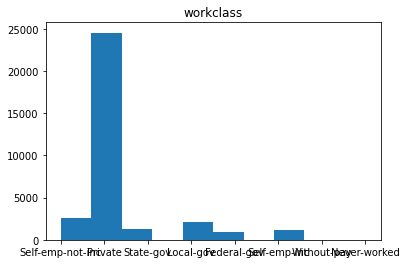

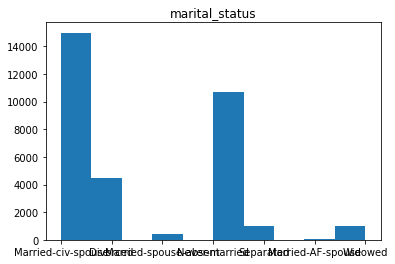

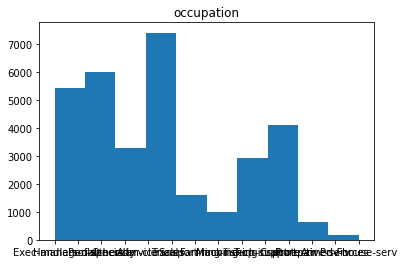

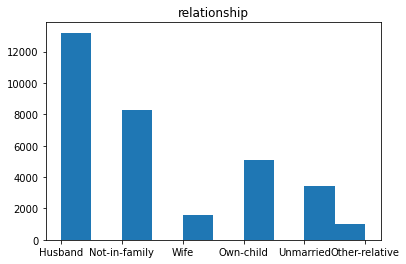

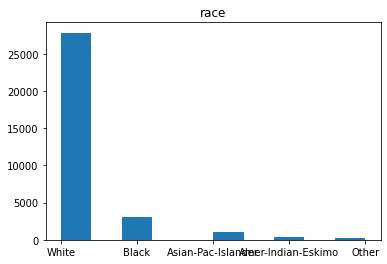

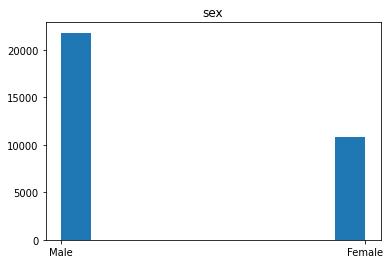

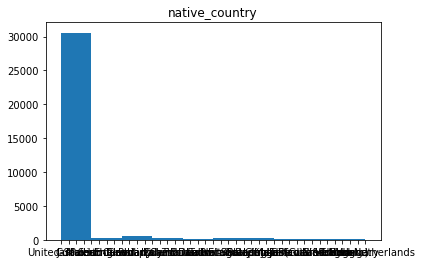

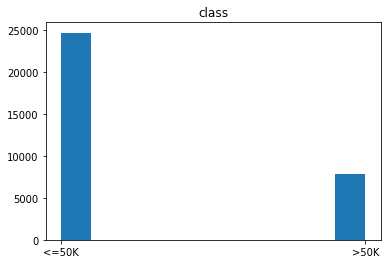

In [13]:
for i in dataset[cat_cols]:
    plt.hist(dataset[i])
    plt.title(i)
    plt.show()

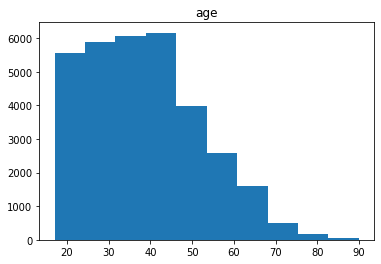

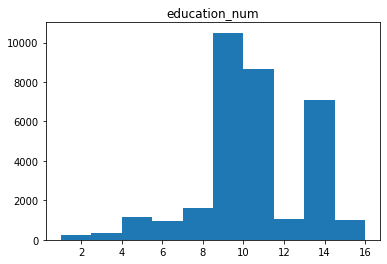

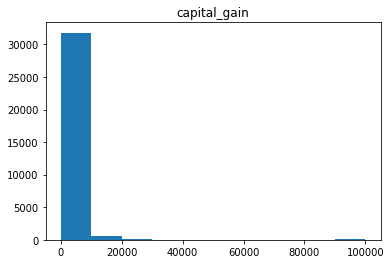

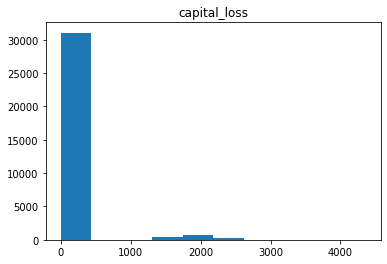

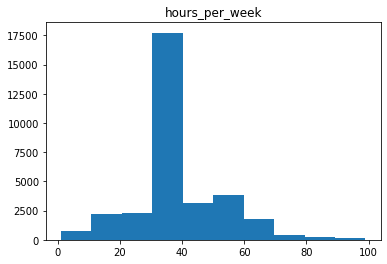

In [ ]:
for i in dataset[num_cols]:
    plt.hist(dataset[i])
    plt.title(i)
    plt.show()

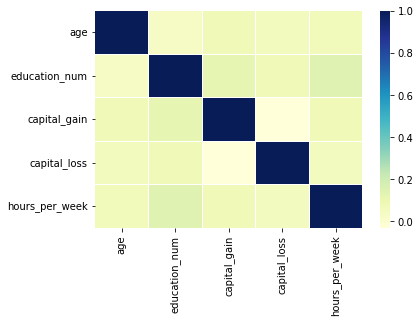

In [ ]:
dataset[num_cols].corr()

sb.heatmap(dataset.corr(), linewidths=0.1, cmap="YlGnBu")

# Label Encoding
**Encoding categorical data to numerical format**

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encoding labels in categorical columns.
dataset['class']= label_encoder.fit_transform(dataset['class'])
dataset['workclass']= label_encoder.fit_transform(dataset['workclass'])
dataset['marital_status']= label_encoder.fit_transform(dataset['marital_status'])
dataset['occupation']= label_encoder.fit_transform(dataset['occupation'])
dataset['race']= label_encoder.fit_transform(dataset['race'])
dataset['relationship']= label_encoder.fit_transform(dataset['relationship'])

In [ ]:
dataset.head() # First five rows of dataset

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,50.0,5,13.0,2,3,0,4,Male,0.0,0.0,13.0,United-States,0
1,38.0,3,9.0,0,5,1,4,Male,0.0,0.0,40.0,United-States,0
2,53.0,3,7.0,2,5,0,2,Male,0.0,0.0,40.0,United-States,0
3,28.0,3,13.0,2,9,5,2,Female,0.0,0.0,40.0,Cuba,0
4,37.0,3,14.0,2,3,5,4,Male,0.0,0.0,40.0,United-States,0


# One hot encoding
Encoding categorical data into numerical format

In [ ]:
dataset['native_country'].value_counts() #Counting different values in column native_country

United-States                 29754
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                            99
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          66
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [ ]:
dataset['sex'].value_counts() # Counting different values in column sex

Male      21792
Female    10768
Name: sex, dtype: int64

In [ ]:
one_hot_encoded_data = pd.get_dummies(dataset, columns = ['sex','native_country'], drop_first=True) # One hot encoding for both columns

In [ ]:
one_hot_encoded_data.head() # Showing first five rows

,age,workclass,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,class,sex_Male,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,50.0,5,13.0,2,3,0,4,0.0,0.0,13.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38.0,3,9.0,0,5,1,4,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53.0,3,7.0,2,5,0,2,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28.0,3,13.0,2,9,5,2,0.0,0.0,40.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37.0,3,14.0,2,3,5,4,0.0,0.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
target= one_hot_encoded_data['class'] # assigning separate varible to desired output column

In [ ]:
one_hot_encoded_data.drop(['class'], axis = 1, inplace = True) # removing output column from input dataset

In [ ]:
one_hot_encoded_data.shape

(32560, 51)

In [ ]:
one_hot_encoded_data.describe() # describing facts about input dataset columns

,age,workclass,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,sex_Male,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581025,3.094625,10.080569,2.611087,6.139865,1.445639,3.666063,1077.780679,87.309193,40.437264,0.669287,0.003716,0.002303,0.001812,0.002918,0.002150,0.000860,0.003256,0.002764,0.000891,0.004208,0.000891,0.001966,0.001351,0.000031,0.000399,0.000614,0.000399,0.003041,0.001321,0.000737,0.002242,0.002488,0.001904,0.000553,0.019748,0.001044,0.000430,0.000952,0.006081,0.001843,0.001136,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.913821,0.002027,0.000491
std,13.640352,1.106696,2.572644,1.505645,3.972096,1.606635,0.848594,7385.390923,402.965826,12.347497,0.470477,0.060848,0.047940,0.042530,0.053938,0.046318,0.029313,0.056965,0.052503,0.029831,0.064731,0.029831,0.044292,0.036736,0.005542,0.019978,0.024777,0.019978,0.055058,0.036317,0.027140,0.047298,0.049816,0.043596,0.023506,0.139136,0.032298,0.020732,0.030842,0.077745,0.042888,0.033691,0.059068,0.019194,0.049508,0.039547,0.023506,0.024150,0.280633,0.044978,0.022162
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,3.000000,10.000000,2.000000,6.000000,1.000000,4.000000,0.000000,0.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [ ]:
target # Output varible column

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: class, Length: 32560, dtype: int64

# Decision tree classification Model building without PCA

In [ ]:
#Sl4pliting data into traing and testing
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(one_hot_encoded_data,target, test_size= 0.30, random_state=42) 

In [ ]:
# Scaling data into same range
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', max_depth=7)  
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
# Creating Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm= confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[7045  351]
 [1090 1282]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7396
           1       0.79      0.54      0.64      2372

    accuracy                           0.85      9768
   macro avg       0.83      0.75      0.77      9768
weighted avg       0.85      0.85      0.84      9768



In [ ]:
classifier.score(x_test,y_test)

0.8524774774774775

# Principle Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(one_hot_encoded_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#Transforming data with PCA
x_pca=pca.transform(one_hot_encoded_data)
print('Principal comp', pca.components_)

Principal comp [[ 1.43504947e-04  4.71684417e-06  4.27111863e-05 -8.83634485e-06
   9.67220875e-06 -1.25980636e-05  1.27482192e-06  9.99998486e-01
  -1.72838995e-03  1.31071397e-04  3.08545451e-06  2.90441569e-08
  -3.00463425e-08 -2.98027743e-08 -3.80083432e-08  1.57028971e-08
  -8.67199288e-09 -3.00447134e-08 -1.07970230e-08 -8.66444514e-09
  -1.47089503e-08  3.35995990e-09 -3.05185835e-08 -2.67025992e-08
  -6.08952184e-10 -7.89033343e-09 -1.21380432e-08 -2.64431640e-09
   1.42903956e-07  2.34091905e-08 -1.01803677e-08 -1.91622186e-08
  -2.74800947e-08  5.12678089e-08 -9.29798469e-09 -2.64543858e-07
  -1.68090987e-08 -8.49527679e-09 -1.77817696e-08 -6.62903974e-09
  -1.32914170e-08 -1.76936671e-08 -4.88205331e-08 -4.36597004e-09
   3.56692361e-08  3.07033101e-08 -1.09224992e-08 -1.15334204e-08
   4.28442919e-07 -1.51324136e-08 -6.58034073e-09]
 [ 2.04200171e-03  9.92530495e-06  5.35807248e-04 -1.32733589e-04
   1.01240173e-04 -2.50791336e-04  4.04945545e-05  1.72783352e-03
   9.99994

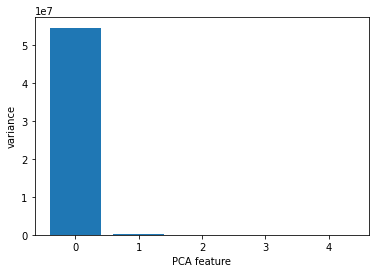

In [ ]:
#Visualizing PCA components variance
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

In [ ]:
x_pca.shape #SHpae of Data after PCA

(32560, 5)

Text(0, 0.5, 'Second principle component')

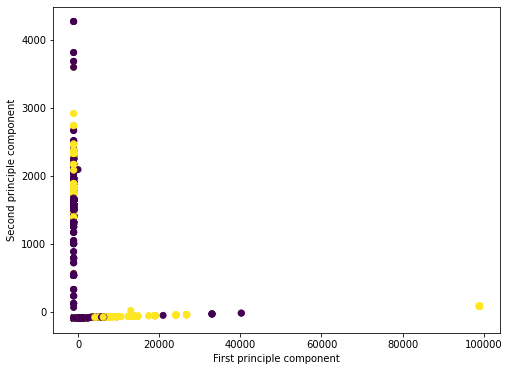

In [ ]:
#Visualizing PCA Components
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataset['class'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

# Decision tree classifier model building with PCA

In [ ]:
#Spliting training data and Testing data
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x_pca,target, test_size= 0.30, random_state=42)  

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()  
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Creating classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm= confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[7045  351]
 [1090 1282]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7396
           1       0.79      0.54      0.64      2372

    accuracy                           0.85      9768
   macro avg       0.83      0.75      0.77      9768
weighted avg       0.85      0.85      0.84      9768

